In [85]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

original_frame1 = cv2.imread("data/tennis492.jpg")
original_frame2 = cv2.imread("data/tennis493.jpg")

# convert to gray-scale
frame1 = cv2.cvtColor(original_frame1,cv2.COLOR_BGR2GRAY)
frame2 = cv2.cvtColor(original_frame2,cv2.COLOR_BGR2GRAY)

Here are 2 consecutive frames of a video showing a tennis player in swinging motion

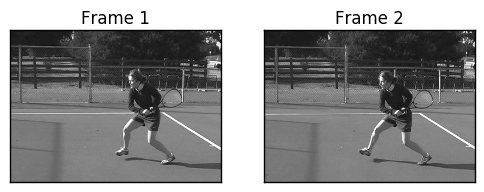

In [86]:
plt.subplot(1,2,1),plt.imshow(frame1, cmap="gray"),plt.title("Frame 1"),plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(frame2, cmap="gray"),plt.title("Frame 2"),plt.xticks([]), plt.yticks([])
plt.show()

Compute a dense optical flow using the Gunnar Farneback algorithm ([See documentation](http://docs.opencv.org/2.4/modules/video/doc/motion_analysis_and_object_tracking.html#calcopticalflowfarneback))

Note that this algorithm only take 8-bit single-channel images

In [87]:
prvs = frame1
next = frame2
initial_flow = None
pyr_scale = 0.5
levels = 3
winsize = 15
iterations = 3
poly_n = 5
poly_sigma = 1.1
flags = 0

flow = cv2.calcOpticalFlowFarneback(prvs, next, initial_flow, pyr_scale, levels, winsize, iterations, 
                                    poly_n, poly_sigma, flags)

print prvs.shape
print next.shape
print flow.shape

(380, 530)
(380, 530)
(380, 530, 2)


Optical Flow is sometimes stored in HSV (Hue, Saturation, Value/Brightness) format, and it could then be visualized by transforming HSV to RGB. __Not sure why this is useful yet.__

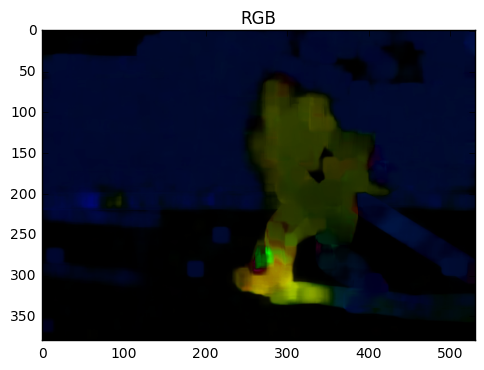

In [303]:
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])

hsv = np.zeros_like(original_frame1)
hsv[...,1] = 255
hsv[...,0] = ang * 180 / np.pi / 2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

plt.subplot(1,1,1),plt.imshow(rgb),plt.title("RGB")
plt.show()

It takes a significantly longer time to plot a 380x520 vector field, therefore we sample every 10 values. 

__I assume [flipud](https://docs.scipy.org/doc/numpy/reference/generated/numpy.flipud.html) has to be called because the optical flow is generated with inverted x and y axis__

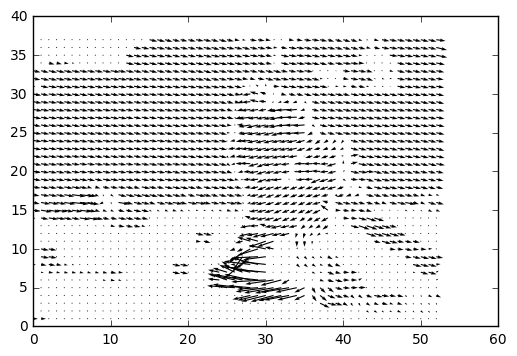

In [337]:
st2 = 10 # variable to reduce density of the vector field
Uf = np.flipud(flow[...,0][::st2, ::st2]) # horizontal optical flow
Vf = np.flipud(-flow[...,1][::st2, ::st2]) # vertical optical flow

Q = plt.quiver(Uf,Vf)
plt.show()

In [341]:
Uf_dense = np.flipud(flow[...,0]) # horizontal optical flow
Vf_dense = np.flipud(-flow[...,1]) # vertical optical flow
m,n = Uf_dense.shape
y,x = np.mgrid[0.:m, 0.:n]

Plot optical flows with magnitudes in 97th percentile

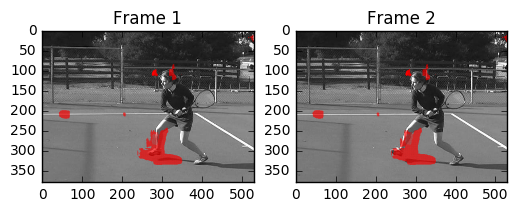

In [343]:
pct = 97
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
mag_threshold = np.percentile(mag.ravel(), pct)

x[mag<mag_threshold] = np.nan
y[mag<mag_threshold] = np.nan

plt.subplot(1,2,1)
Q = plt.quiver(x,y,Uf_dense,Vf_dense,color='r')
plt.imshow(frame1, cmap="gray"),plt.title("Frame 1")
plt.subplot(1,2,2)
Q = plt.quiver(x,y,Uf_dense,Vf_dense,color='r')
plt.imshow(frame2, cmap="gray"),plt.title("Frame 2")
plt.show()